<a href="https://colab.research.google.com/github/anejaprerna19/Crop-Recommendation/blob/main/CropPAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
cp=pd.read_csv("Crop_recommendation.csv")

In [ ]:
cp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Area,Production,Code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,14512,22405.0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8366,15865.0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,5320,11416.0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4401,7842.0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3700,7645.0,1


In [ ]:
cp.info()

NameError: ignored

In [ ]:
cp['Production']=cp['Production'].astype(str).astype(float)

In [ ]:
cp.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Area', 'Production', 'Code'],
      dtype='object')

In [ ]:
cp.shape

(2100, 11)

In [ ]:
cp['label'].unique()

array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana',
       'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [ ]:
cp.label.unique()

array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana',
       'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [ ]:
cp.label.value_counts()

muskmelon      100
grapes         100
mango          100
coffee         100
papaya         100
mungbean       100
watermelon     100
maize          100
pomegranate    100
orange         100
mothbeans      100
banana         100
kidneybeans    100
jute           100
lentil         100
pigeonpeas     100
cotton         100
apple          100
coconut        100
rice           100
blackgram      100
Name: label, dtype: int64

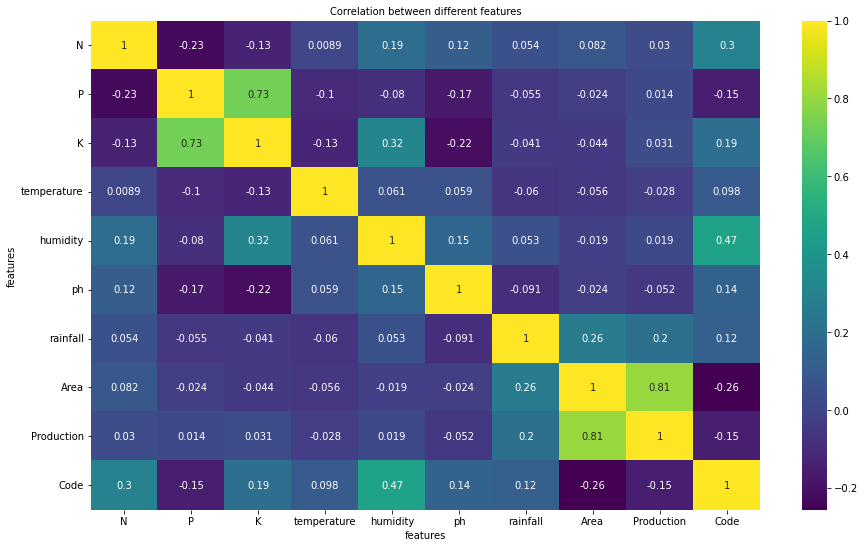

In [ ]:
fig,ax= plt.subplots(1,1, figsize=(15,9))
sns.heatmap(cp.corr(), annot=True, cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features',
          fontsize=10,
          c='black')
plt.show()


In [ ]:
crop_summary = pd.pivot_table(cp, index=['label'], 
aggfunc='mean')
crop_summary.tail()

,Area,Code,K,N,P,Production,humidity,ph,rainfall,temperature
label,,,,,,,,,,
papaya,591.04,17,50.04,49.88,59.05,16706.38,92.403388,6.741442,142.627839,33.723859
pigeonpeas,3044.53,4,20.29,20.73,67.73,5531.33,48.061633,5.794175,149.457564,27.741762
pomegranate,2838.94,9,40.21,18.87,18.75,1210.72,90.125504,6.429172,107.528442,21.837842
rice,50847.84,1,39.87,79.89,47.58,115067.17,82.272822,6.425471,236.181114,23.689332
watermelon,127.02,13,50.22,99.42,17.00,0.00,85.160375,6.495778,50.786219,25.591767


In [ ]:
# Feature selection

features=cp[['N','P','K','temperature','humidity','ph','rainfall']]
target = cp['Code']

In [ ]:
# For crop yield prediction (feature selection)
f= cp[['N','P','K','temperature','humidity','ph','rainfall','Area','Code']]
t= cp['Production']

In [ ]:
from sklearn.model_selection import train_test_split
X_ptrain,X_ptest,y_ptrain,y_ptest=train_test_split(f,t,test_size=0.2,random_state=2)

In [ ]:
# Random Forest for crop yield prediction
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_ptrain,y_ptrain)
y_yield = RF.predict(X_ptest)
y_yield


array([2.00000e+00, 0.00000e+00, 2.33800e+03, 2.95000e+02, 0.00000e+00,
       0.00000e+00, 3.18000e+02, 1.46000e+02, 0.00000e+00, 0.00000e+00,
       1.83400e+03, 0.00000e+00, 8.50000e+01, 1.65300e+03, 1.95000e+02,
       0.00000e+00, 1.60000e+03, 0.00000e+00, 2.55000e+02, 0.00000e+00,
       2.18400e+03, 0.00000e+00, 0.00000e+00, 1.00000e+02, 4.58200e+03,
       4.74900e+03, 9.33000e+02, 1.43000e+02, 0.00000e+00, 4.10000e+01,
       5.81000e+02, 1.59700e+03, 0.00000e+00, 4.05000e+02, 2.50350e+04,
       1.68300e+03, 2.18400e+03, 3.16000e+02, 0.00000e+00, 1.30100e+03,
       1.45000e+03, 0.00000e+00, 1.51000e+02, 7.49000e+02, 5.86000e+02,
       5.49000e+03, 2.20000e+01, 1.45000e+02, 0.00000e+00, 5.00000e+00,
       0.00000e+00, 0.00000e+00, 1.43000e+02, 2.26800e+03, 0.00000e+00,
       5.58100e+03, 0.00000e+00, 1.13490e+04, 1.51000e+02, 4.50000e+02,
       3.47800e+03, 0.00000e+00, 2.69000e+02, 7.49000e+02, 1.77700e+03,
       6.48000e+02, 3.60000e+01, 1.04400e+03, 8.25000e+02, 1.395

In [ ]:
acc=[]
model=[]

In [ ]:
# Crop Recommendation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [ ]:
# Applying K-Nearest Neighbors
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)
y_preds= knn.predict(X_test)

x= metrics.accuracy_score(y_test, y_preds)
acc.append(x)

model.append('K Nearest Neighbours')
print('KNN Accuracy is :',x)

KNN Accuracy is : 0.9857142857142858


In [ ]:
!pip install classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.94      0.84      0.89        19
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        21
           4       1.00      0.95      0.97        20
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        21
           7       0.96      1.00      0.98        23
           8       1.00      0.95      0.98        22
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        21
          17       1.00      1.00      1.00        27
          18       1.00    

In [ ]:
score= cross_val_score(knn, features, target, cv=10)
print('Cross validation score is ',score)

Cross validation score is  [0.97142857 0.97619048 0.98095238 0.97142857 0.97619048 0.99047619
 0.99047619 0.97619048 0.98095238 0.97142857]


In [ ]:
# Accuracy of Test and train sets

print("KNN (Train Accuracy) ",knn.score(X_train, y_train))
print("KNN (Test Accuracy) ",knn.score(X_test,y_test))

KNN (Train Accuracy)  0.9845238095238096
KNN (Test Accuracy)  0.9857142857142858


In [ ]:
# Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

dt.fit(X_train,y_train)
y_preds= dt.predict(X_test)
x=metrics.accuracy_score(y_test, y_preds)
acc.append(x)
model.append('Decision Tree')
print("Accuracy of Decision Tree is", x*100)

Accuracy of Decision Tree is 92.38095238095238


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83        19
           2       0.74      0.94      0.83        18
           3       1.00      0.81      0.89        21
           4       1.00      1.00      1.00        20
           5       0.71      0.57      0.63        21
           6       1.00      1.00      1.00        21
           7       0.72      1.00      0.84        23
           8       0.94      0.77      0.85        22
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        18
          13       0.93      1.00      0.96        13
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        21
          17       1.00      0.78      0.88        27
          18       1.00    

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

y_preds = RF.predict(X_test)

x = metrics.accuracy_score(y_test, y_preds)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,y_preds))

Random Forest Accuracy is:  0.9857142857142858
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        23
           8       1.00      0.91      0.95        22
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        21
          17       1.00      1.00 

In [ ]:
cp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Area,Production,Code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,14512,22405.0,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8366,15865.0,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,5320,11416.0,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4401,7842.0,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3700,7645.0,1


In [ ]:
cp.label.unique()


array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana',
       'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [ ]:
dict={1:'rice', 2:'maize', 3:'kidneybeans', 4:'peas', 5:'mothbeans', 6:'moong', 7:'blackgram', 8:'lentil', 9:'pomegranate', 10:'banana', 11:'mango', 12:'grapes', 13:'watermelon', 14:'muskmelon', 15:'apple', 16:'orange', 17:'papaya', 18:'coconut', 19:'cotton', 20:'jute', 21:'coffee'}

In [ ]:
score = cross_val_score(dt, features, target, cv=4)
print("Cross validation score ", score)

Cross validation score  [0.94285714 0.92380952 0.93333333 0.94666667]


In [ ]:
#Crop Recommendation
def prediction () :

  arr=np.array([90,40,35,20,60,5,200])
  df=pd.DataFrame(arr)
  df=df.T
  pred_ans=dt.predict(df)
  ans=(int) (pred_ans)
  print(dict[ans])


In [ ]:

prediction()

coffee


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
24#Train and test accuracy

print ("Decision tree (training accuracy) ",dt.score(X_train,y_train))
print("Decision tree (test accuracy) ",dt.score(X_test,y_test))

Decision tree (training accuracy)  0.9464285714285714
Decision tree (test accuracy)  0.9238095238095239


In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.9952381  0.99047619 0.9952381  0.9952381  0.99285714]


In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.9928571428571429
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00   

In [ ]:
# XGBoost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.9952380952380953
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        23
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        17
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      0.95      0.98        22
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1

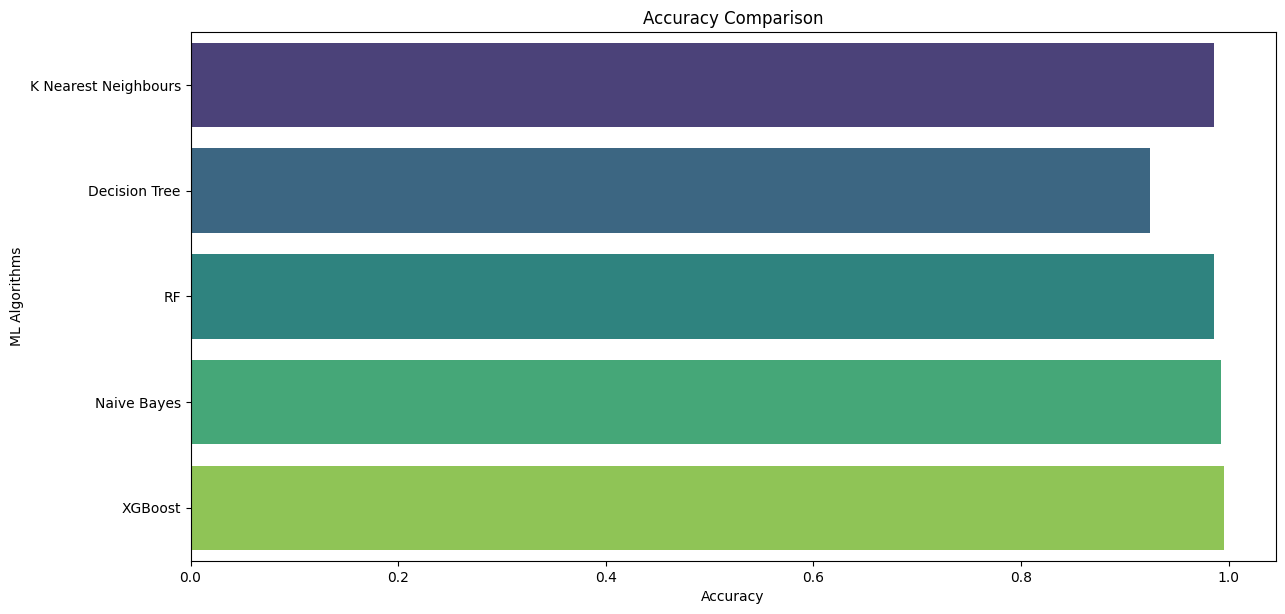

In [ ]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')